In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
CNN_dir = "/content/drive/MyDrive/CNN"

data, info = tfds.load('imagenette/320px-v2', with_info=True, as_supervised=True)
num_classes = info.features['label'].num_classes

def preprocess(image, label):
  image = tf.image.resize(image, (227, 227))
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

train_set = data['train']
validation_set = data['validation']

def one_hot_encode(image, label):
  label = tf.one_hot(label, num_classes)
  return image, label

train_set = data['train'].map(preprocess).map(one_hot_encode).cache().shuffle(buffer_size=1024).batch(16).prefetch(tf.data.AUTOTUNE)
validation_set = validation_set.map(preprocess).map(one_hot_encode).cache().batch(32).prefetch(tf.data.AUTOTUNE)

model = keras.models.Sequential([
  keras.layers.Conv2D(filters=96, kernel_size=(11, 11),  strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
  keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
  keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(4096, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(4096, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_set, epochs=50, validation_data=validation_set)
model.save(CNN_dir+"/AlexNet.keras")

Mounted at /content/drive


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/9469 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/320px-v2/incomplete.P5IMMO_1.0.0/imagenette-train.tfrecord*...:…

Generating validation examples...:   0%|          | 0/3925 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/320px-v2/incomplete.P5IMMO_1.0.0/imagenette-validation.tfrecord…

Dataset imagenette downloaded and prepared to /root/tensorflow_datasets/imagenette/320px-v2/1.0.0. Subsequent calls will reuse this data.
Epoch 1/50
592/592 [==============================] - 64s 80ms/step - loss: 5.2990 - accuracy: 0.2123 - val_loss: 2.1194 - val_accuracy: 0.2589
Epoch 2/50
592/592 [==============================] - 26s 44ms/step - loss: 2.2731 - accuracy: 0.2666 - val_loss: 2.0170 - val_accuracy: 0.3093
Epoch 3/50
592/592 [==============================] - 26s 44ms/step - loss: 2.1833 - accuracy: 0.2850 - val_loss: 1.9698 - val_accuracy: 0.3434
Epoch 4/50
592/592 [==============================] - 26s 44ms/step - loss: 2.1099 - accuracy: 0.3191 - val_loss: 1.9701 - val_accuracy: 0.3483
Epoch 5/50
592/592 [==============================] - 26s 43ms/step - loss: 2.0689 - accuracy: 0.3238 - val_loss: 2.1770 - val_accuracy: 0.2938
Epoch 6/50
592/592 [==============================] - 26s 44ms/step - loss: 2.0358 - accuracy: 0.3391 - val_loss: 1.9513 - val_accuracy: 0.353

1/1 [==============================] - 0s 27ms/step


<Figure size 1000x1000 with 0 Axes>

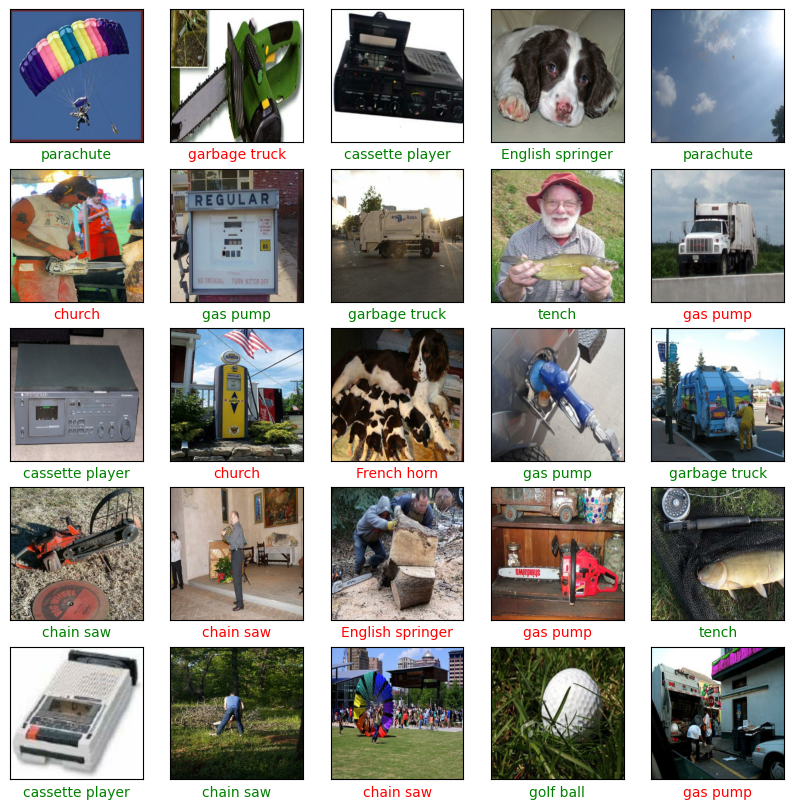

1/1 [==============================] - 0s 48ms/step


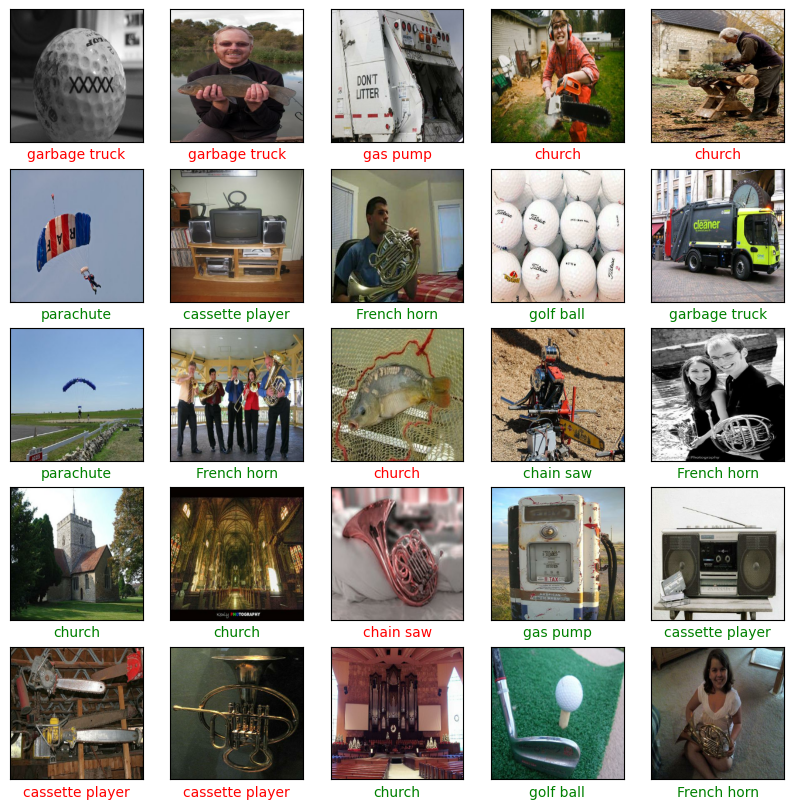

1/1 [==============================] - 0s 37ms/step


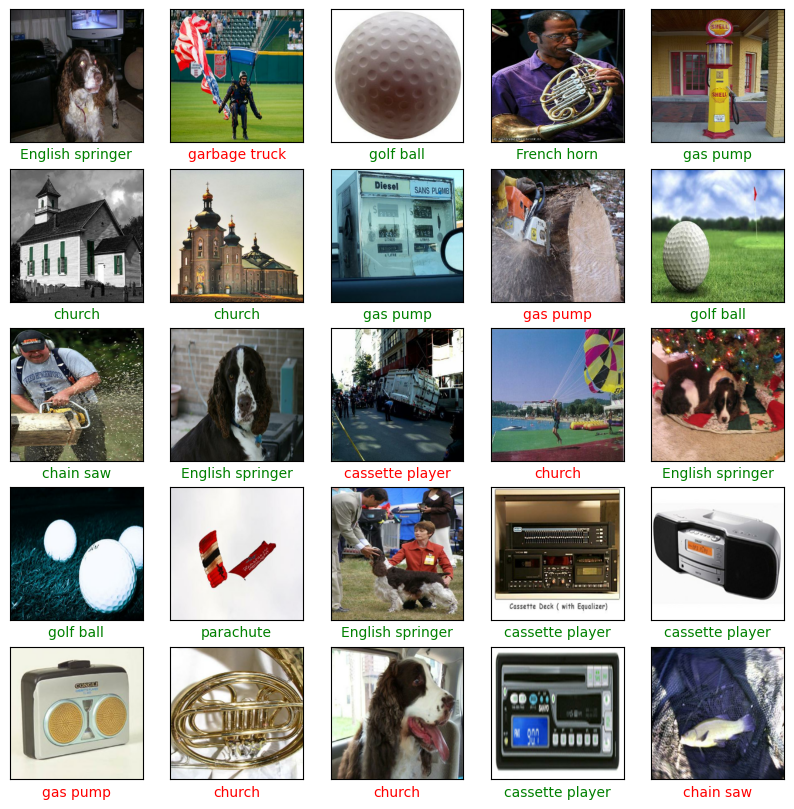

In [11]:
# model = keras.models.load_model('model.h5')
CLASS_NAMES = ['tench', 'English springer', 'cassette player', 'chain saw',
               'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']
plt.figure(figsize=(10, 10))
num_batches = 3
batch_start = 0
for batch_num in range(num_batches):
  plt.figure(figsize=(10, 10))
  test_images = []
  test_labels = []
  predicted_labels = []
  for i, (images, labels) in enumerate(validation_set.skip(batch_start).take(1)):
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    true_class = np.argmax(test_labels[i])
    predicted_class_label = CLASS_NAMES[predicted_labels[i]]
    true_class_label = CLASS_NAMES[true_class]

    if predicted_labels[i] == true_class:
      color = 'green'
    else:
      color = 'red'

    plt.xlabel(f"{predicted_class_label}", color=color)
  plt.show()

  batch_start += 1